In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("C:/Users/User/github/data/TFTLCD/TFT_EDA_ALL.csv")

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head(1)

,TIME_STAMP,TOOL_NAME,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,MP_ALLSTEP.OUTER_TEMP.Stdev,MP_ALLSTEP.WALLHTR_TEMP1.Mean,MP_ALLSTEP.WALLHTR_TEMP1.Stdev,MP_STEP1_First10sec.PC_PRESSURE.Area,MP_STEP1_First10sec.PC_PRESSURE.Min,...,MP_STEP4.PC_TV_ANGLE.Stdev,MP_STEP4.RFGEN_FORWARD.Mean,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max,MP_STEP4.EI4.Max
0,2011-06-04 5:19,Tool4,339.4905,0.5003,359.1997,0.4001,135.0,0.0,0.0993,0.003,...,0.0596,22744.9012,2.8132,6784.9612,3.4718,224.8672,910.9443,101.18,100.73,100.73


In [103]:
a = df.iloc[:,2]
b = df.iloc[:,4]
c = df.iloc[:,6]

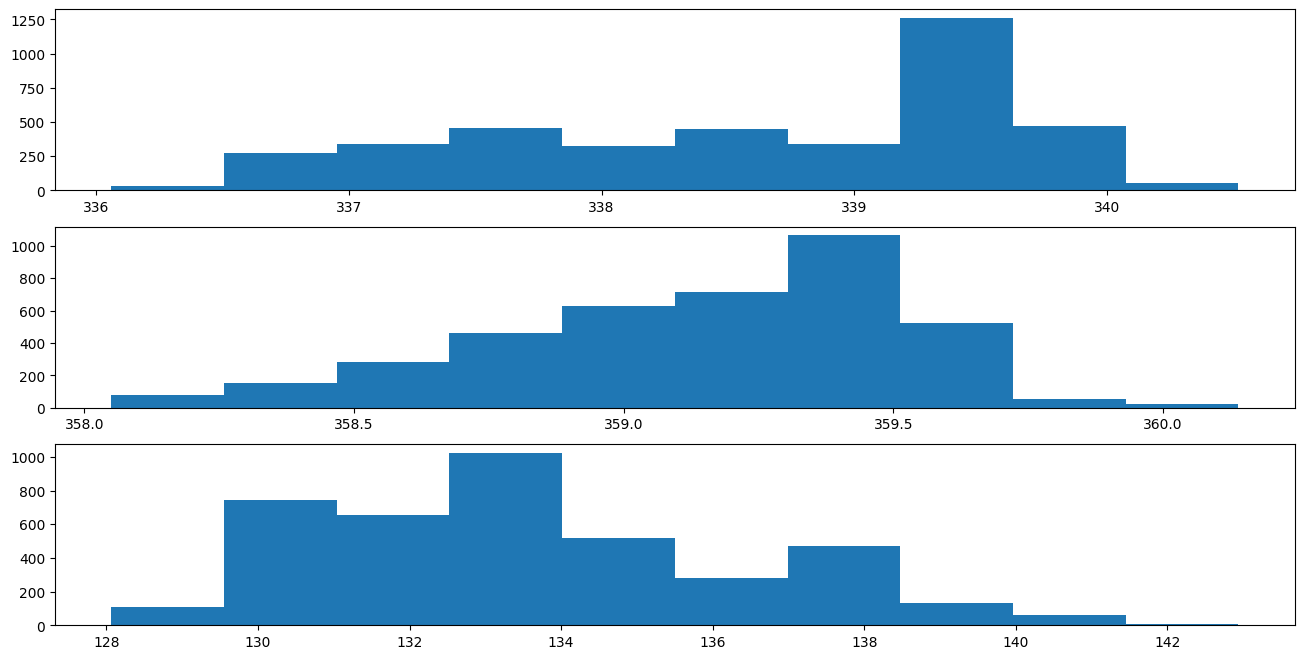

In [106]:
fig = plt.figure(figsize = (16,8))
plt.subplot(3,1,1)
plt.hist(a, stacked=True)
plt.subplot(3,1,2)
plt.hist(b)
plt.subplot(3,1,3)
plt.hist(c)
plt.show()

In [101]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

In [52]:
train = df.iloc[:2001,2:]
test = df.iloc[2000:4001,2:]

In [60]:
model = IsolationForest(n_estimators=50, max_samples=256, contamination=float(0.1),max_features=1.0)

In [61]:
model.fit(train)

IsolationForest(contamination=0.1, max_samples=256, n_estimators=50)

In [63]:
anomaly = model.predict(test)

In [66]:
test['anomaly'] = anomaly